 ## Reconhecimento da linguagem de sinais a partir de imagens com Deep Learning | EstatiDados
![](asl.png)

## 1. Obtendo o dataset

- https://www.kaggle.com/grassknoted/asl-alphabet

In [2]:
# Importando os pacotes e configurando as sementes pseudoaleatórias
import numpy as np
np.random.seed(2)
import tensorflow as tf
tf.set_random_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import sign_language

Using TensorFlow backend.


In [3]:
# Carregando o conjunto de treino e de teste
(X_train, y_train), (X_test, y_test) = sign_language.load_data()

## 2. Visualizando os dados de treinamento

In [4]:
print(X_train.shape)
print(y_train.shape)
print(set(y_train))
print(y_train[:10])

(1600, 50, 50, 3)
(1600,)
{0, 1, 2}
[2 0 2 0 2 0 1 0 0 1]


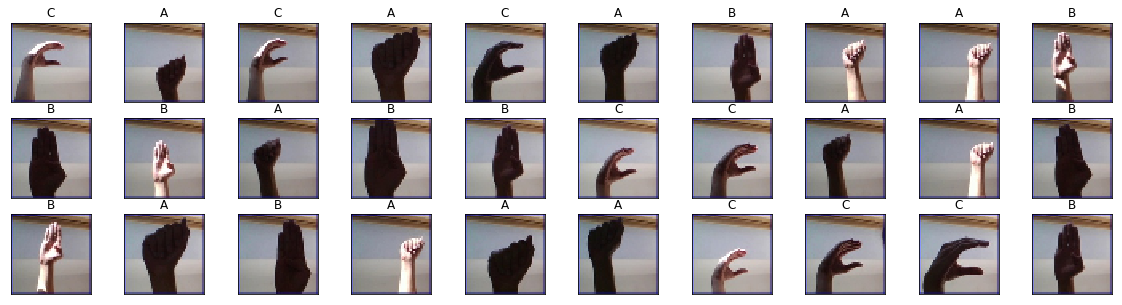

In [5]:
# Armazenando os rótulos do conjunto de dados
labels = ['A', 'B', 'C']

# Visualizando algumas imagens do conjunto de treinamento com seu rótulo 
fig = plt.figure(figsize=(20,5))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()    

In [20]:
print(y_train[1])
print(labels[y_train[1]])

0
A


## 3. One-hot encode

![](onehot.png)

In [7]:
from keras.utils import np_utils

# Codificando os rótulos de treino
y_train_OH = np_utils.to_categorical(y_train)

# Codificando os rótulos de teste
y_test_OH = np_utils.to_categorical(y_test)

In [8]:
print(y_train[:5])
print("")
print(y_train_OH[:5])

[2 0 2 0 2]

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


## 4. Construindo a rede neural convolucional

In [9]:
# Importando os módulos necessários
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Utilizando o modelo Sequential
model = Sequential()

# Primeira camada recebe a imagem
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation ='relu', input_shape=(50,50,3)))

# Adicionando a max pooling layer
model.add(MaxPooling2D(4))

# Adicionando outra convolutional layer
model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation ='relu'))

# Adicionando outra max pooling layer
model.add(MaxPooling2D(4))

# Flatten output layer
model.add(Flatten())
model.add(Dense(3, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


![](filtros_conv.gif)

![](keras_conv2d_padding.gif)

![](keras_conv2d_activation_functions.png)

![](maxpool_animation.gif)

![](Example-CNN.png)

![](nossa_cnn.png)

## 5. Compilando o modelo

In [10]:
# Compilando o modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 6. Treinando a CNN

In [11]:
# Treinando o modelo
model.fit(X_train, y_train_OH, validation_split=0.2, epochs=5)


Instructions for updating:
Use tf.cast instead.
Train on 1280 samples, validate on 320 samples
Epoch 1/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.9384 - acc: 0.5734 - val_loss: 0.6847 - val_acc: 0.7281
Epoch 2/5
1280/1280 [==============================] - 5s 4ms/step - loss: 0.5511 - acc: 0.8141 - val_loss: 0.4049 - val_acc: 0.8531
Epoch 3/5
1280/1280 [==============================] - 4s 3ms/step - loss: 0.3572 - acc: 0.8945 - val_loss: 0.2791 - val_acc: 0.9187
Epoch 4/5
1280/1280 [==============================] - 4s 3ms/step - loss: 0.2614 - acc: 0.9266 - val_loss: 0.2776 - val_acc: 0.8500
Epoch 5/5
1280/1280 [==============================] - 4s 3ms/step - loss: 0.1901 - acc: 0.9516 - val_loss: 0.1520 - val_acc: 0.9469


## 7. Testando a CNN

In [12]:
# Obtendo a perda e acurácia do conjunto de teste
model.evaluate(X_test, y_test_OH)

400/400 [==============================] - 1s 2ms/step


[0.15302393674850465, 0.9625]

## 8. Visualizando os erros da CNN

[ 10 113 122 149 170 204 209 250 268 274 320 352 386 394 399]


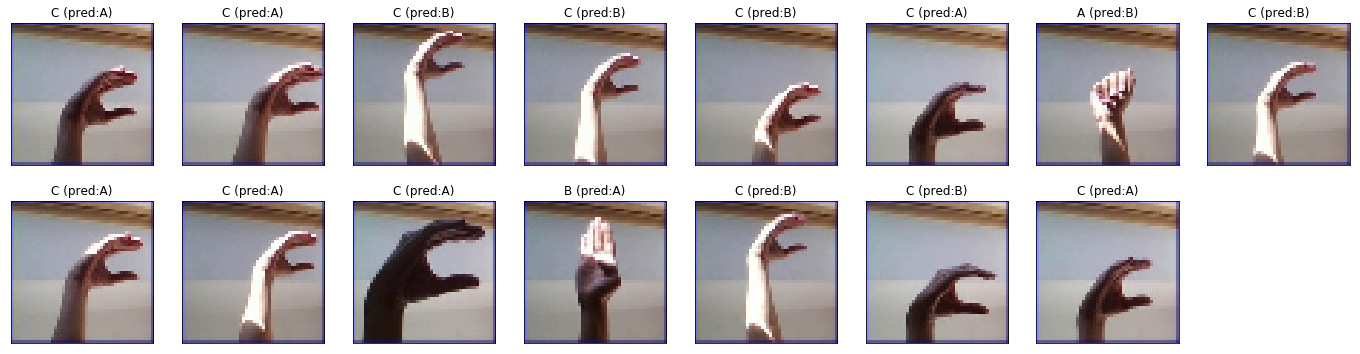

In [16]:
# Armazenando as predições do conjunto de teste em y_preds
y_pred = model.predict_classes(X_test)

# Armazenando os indices do dataframe que o modelo errou a predição em bad_test_idxs
bad_test_idxs = np.where(y_test != y_pred)[0]
print(bad_test_idxs)

# Visualizando os erros
fig = plt.figure(figsize=(24,6))
for i, idx in enumerate(bad_test_idxs):
    ax = fig.add_subplot(2, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test[idx])
    ax.set_title('{} (pred:{})'.format(labels[y_test[idx]], labels[y_pred[idx]]))

## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Site: http://viniciusgalvaoia.com.br

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Visualizando a matriz de confusão
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_preds)
print(confusion)

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(confusion)
plt.show()

In [ ]:
l = ['hello', 'world', 'hi', 'earth']
for i, word in enumerate(l):
    print(i, word)